<h4>Sigmoid Case Study</h4>

#### Importing  required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#### Training Dataset

In [2]:
df_train = pd.read_csv('./Data/train_data.txt', sep="|")

In [3]:
df_train.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54
0,14.0,0.0,NaN,0.0,28.0,35.0,24.0,337.12,3992220.0,NaN,...,NhsEn4L,NaN,UYBR,xtRDFjT,oslk,BDw0V7y,LM8l689qOp,NaN,WqMG,RAYp
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NhsEn4L,NaN,cJvF,QMaRwBA,oslk,0D0gQ7h,LM8l689qOp,NaN,7P5s,RAYp
2,791.0,7.0,NaN,148.0,32.0,40.0,8.0,220.08,38994.0,NaN,...,NhsEn4L,pAYuLzc,cJvF,4PcK5YS,oslk,bTP9hga,NaN,ELof,xb3V,RAYp
3,2142.0,14.0,NaN,6592.0,188.0,235.0,96.0,260.24,1428156.0,NaN,...,FMSzZ91zL2,9EXPHGn,cJvF,Tvpip6Z,zCkv,hHJsvbM,LM8l689qOp,ELof,rgKb,6fzt
4,371.0,7.0,NaN,3088.0,144.0,180.0,8.0,166.56,18960.0,NaN,...,XfqtO3UdzaXh_,MmBslbE,cJvF,R8k3REx,oslk,X9aaldM,LM8l689qOp,ELof,FSa2,RAYp


#### Churn Flag

In [4]:
df_churn = pd.read_csv('./Data/churn_labels.txt', sep="|", header=None, names=["churn_label"])

In [5]:
df_churn.count()

churn_label    20000
dtype: int64

#### Combining both the Dataframes

In [6]:
df_final = pd.concat([df_train.reset_index(drop=True), df_churn], axis=1)

In [7]:
df_final.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,churn_label
0,14.0,0.0,NaN,0.0,28.0,35.0,24.0,337.12,3992220.0,NaN,...,NaN,UYBR,xtRDFjT,oslk,BDw0V7y,LM8l689qOp,NaN,WqMG,RAYp,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,cJvF,QMaRwBA,oslk,0D0gQ7h,LM8l689qOp,NaN,7P5s,RAYp,-1
2,791.0,7.0,NaN,148.0,32.0,40.0,8.0,220.08,38994.0,NaN,...,pAYuLzc,cJvF,4PcK5YS,oslk,bTP9hga,NaN,ELof,xb3V,RAYp,-1
3,2142.0,14.0,NaN,6592.0,188.0,235.0,96.0,260.24,1428156.0,NaN,...,9EXPHGn,cJvF,Tvpip6Z,zCkv,hHJsvbM,LM8l689qOp,ELof,rgKb,6fzt,-1
4,371.0,7.0,NaN,3088.0,144.0,180.0,8.0,166.56,18960.0,NaN,...,MmBslbE,cJvF,R8k3REx,oslk,X9aaldM,LM8l689qOp,ELof,FSa2,RAYp,-1


### Preparing the datasets

In [8]:
#Check for Nulls
df_final.isnull().sum()

Var1            2233
Var2            2219
Var3           20000
Var4            2219
Var5            2233
Var6            2012
Var7            2012
Var8            2013
Var9            2012
Var10          19901
Var11              0
Var12           2219
Var13           2012
Var14          19701
Var15           2012
Var16           2012
Var17           2892
Var18           2012
Var19              0
Var20           2012
Var21           2219
Var22           5613
Var23           2012
Var24           2012
Var25           2233
Var26           2892
Var27           2012
Var28           2012
Var29          19505
Var30          19597
Var31            141
Var32              0
Var33              0
Var34              0
Var35             56
Var36              0
Var37              1
Var38          14970
Var39              0
Var40              0
Var41            785
Var42           2233
Var43             56
Var44              0
Var45              0
Var46          10203
Var47            286
Var48        

In [9]:
#Dropping columns which have all Null values
df_final=df_final.dropna(axis='columns',how='all')

In [10]:
#Columnn data types
df_final.dtypes

Var1           float64
Var2           float64
Var4           float64
Var5           float64
Var6           float64
Var7           float64
Var8           float64
Var9           float64
Var10          float64
Var11            int64
Var12          float64
Var13          float64
Var14          float64
Var15          float64
Var16          float64
Var17          float64
Var18          float64
Var19          float64
Var20          float64
Var21          float64
Var22          float64
Var23          float64
Var24          float64
Var25          float64
Var26          float64
Var27          float64
Var28          float64
Var29          float64
Var30           object
Var31           object
Var32           object
Var33           object
Var34           object
Var35           object
Var36           object
Var37           object
Var38           object
Var39           object
Var40           object
Var41           object
Var42           object
Var43           object
Var44           object
Var45      

In [11]:
# Selecting Numerical features only
df1=df_final.select_dtypes(include=['float64'])
df1.max()#df1.max(axis=1)

Var1       131761.00
Var2           42.00
Var4        46068.00
Var5        24940.00
Var6        31175.00
Var7         8912.00
Var8         2681.36
Var9     18144000.00
Var10      223728.30
Var12      142156.00
Var13    19353600.00
Var14         558.00
Var15          39.00
Var16        3145.00
Var17        4984.00
Var18        5280.00
Var19     9932480.00
Var20       10704.00
Var21     3890952.00
Var22          68.00
Var23         120.00
Var24          18.00
Var25          81.00
Var26    16934400.00
Var27    13907800.00
Var28    14515200.00
Var29         628.62
dtype: float64

In [12]:
df1.min()#df1.max(axis=1)

Var1           0.00
Var2           0.00
Var4           0.00
Var5           0.00
Var6           0.00
Var7           0.00
Var8         -66.88
Var9           0.00
Var10          0.00
Var12          0.00
Var13          0.00
Var14          0.00
Var15          0.00
Var16          0.00
Var17          0.00
Var18          0.00
Var19   -9803600.00
Var20          0.00
Var21          0.00
Var22        -32.00
Var23          0.00
Var24          0.00
Var25          0.00
Var26          0.00
Var27          0.00
Var28          0.00
Var29         -6.42
dtype: float64

In [13]:
# Filling Null values in each numerical column
df2=df1.fillna(-1000)

In [14]:
df2.head()

,Var1,Var2,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var12,...,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29
0,14.0,0.0,0.0,28.0,35.0,24.0,337.12,3992220.0,-1000.0,0.0,...,12.0,0.0,-10.0,8.0,0.0,0.0,0.0,6793000.0,0.0,-1000.0
1,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.00,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-22.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
2,791.0,7.0,148.0,32.0,40.0,8.0,220.08,38994.0,-1000.0,49.0,...,6.0,106686.0,22.0,0.0,0.0,9.0,0.0,9103760.0,0.0,-1000.0
3,2142.0,14.0,6592.0,188.0,235.0,96.0,260.24,1428156.0,-1000.0,112.0,...,42.0,13293.0,-28.0,0.0,0.0,27.0,1209600.0,10151760.0,518400.0,-1000.0
4,371.0,7.0,3088.0,144.0,180.0,8.0,166.56,18960.0,-1000.0,77.0,...,24.0,17397.0,-1000.0,0.0,0.0,9.0,11613.0,116088.0,18210.0,-1000.0


In [15]:
#Selecting all Categorical packages
df3=df_final.select_dtypes(include=['object'])
df3.dtypes#df1.max(axis=1)

Var30    object
Var31    object
Var32    object
Var33    object
Var34    object
Var35    object
Var36    object
Var37    object
Var38    object
Var39    object
Var40    object
Var41    object
Var42    object
Var43    object
Var44    object
Var45    object
Var46    object
Var47    object
Var48    object
Var49    object
Var50    object
Var51    object
Var52    object
Var53    object
Var54    object
dtype: object

In [16]:
#Replacing Null values as Unknown
df4=df3.fillna('Unknown')

In [17]:
df4.apply(pd.Series.nunique)

Var30       2
Var31     321
Var32      46
Var33      22
Var34       3
Var35     205
Var36    2784
Var37    2777
Var38       3
Var39    4776
Var40     100
Var41       4
Var42      22
Var43       3
Var44       2
Var45      74
Var46    7826
Var47       3
Var48    2784
Var49       7
Var50    2784
Var51       5
Var52       4
Var53      23
Var54       7
dtype: int64

In [18]:
#Features with atmost 10 levels
df4_p1=df4.loc[:, df4.apply(lambda x: x.nunique()) <= 10]

In [19]:
#Dummyfying columns with less than 10 features
new_df4_p1=pd.get_dummies(df4_p1)

In [20]:
new_df4_p1.head()

,Var30_Unknown,Var30_r__I,Var34_1K8T,Var34_JA1C,Var34_z3mO,Var38_6dX3,Var38_Unknown,Var38_smXZ,Var41_09_Q,Var41_Unknown,...,Var52_Unknown,Var52_kG3k,Var52_xG3x,Var54_02N6s8f,Var54_6fzt,Var54_RAYp,Var54_ZI9m,Var54_nIGXDli,Var54_nIGjgSB,Var54_vJ_w8kB
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
#Features with more than 10 levels
df4_p2=df4.loc[:, df4.apply(lambda x: x.nunique()) > 10]

In [22]:
df4_p2.apply(pd.Series.nunique)

Var31     321
Var32      46
Var33      22
Var35     205
Var36    2784
Var37    2777
Var39    4776
Var40     100
Var42      22
Var45      74
Var46    7826
Var48    2784
Var50    2784
Var53      23
dtype: int64

In [23]:
#Count for each level in each column
values = df4_p2.apply(pd.value_counts)
values

,Var31,Var32,Var33,Var35,Var36,Var37,Var39,Var40,Var42,Var45,Var46,Var48,Var50,Var53
000J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.0,NaN,NaN,NaN,NaN,NaN,NaN
0062,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00AD,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00ARusu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN
00AhP4J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
00J8E9a,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00TGf3V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
00TGzAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
00TI_aG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
00TNuBd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [24]:
#Replacing each level with percentage frequnecy
new_df4_p2 = pd.DataFrame()
for x in df4_p2.columns:
    new_df4_p2[x] = df4_p2[x].apply(lambda row: values[x][row]/len(df4_p2))
new_df4_p2

,Var31,Var32,Var33,Var35,Var36,Var37,Var39,Var40,Var42,Var45,Var46,Var48,Var50,Var53
0,0.00580,0.71850,0.95965,0.08855,0.00035,0.00005,0.00150,0.02610,0.33995,0.58660,0.51015,0.00035,0.00035,0.08315
1,0.00665,0.71850,0.95965,0.00375,0.00335,0.01235,0.00005,0.01615,0.11165,0.58660,0.51015,0.00335,0.00335,0.05895
2,0.00425,0.71850,0.95965,0.08855,0.00075,0.00640,0.00005,0.00725,0.33995,0.58660,0.00005,0.00075,0.00075,0.04235
3,0.00545,0.71850,0.95965,0.08855,0.01420,0.00100,0.00100,0.00775,0.02295,0.02765,0.00005,0.01420,0.01420,0.02895
4,0.00395,0.14715,0.95965,0.05910,0.00005,0.00110,0.00030,0.02075,0.05835,0.13045,0.00005,0.00005,0.00005,0.15935
5,0.00730,0.04510,0.95965,0.08705,0.00055,0.00005,0.00020,0.01205,0.07870,0.01210,0.00010,0.00055,0.00055,0.04235
6,0.00045,0.71850,0.95965,0.00450,0.00095,0.00250,0.00020,0.02255,0.33995,0.58660,0.51015,0.00095,0.00095,0.09690
7,0.00490,0.71850,0.95965,0.09330,0.00090,0.00440,0.00090,0.02175,0.03630,0.58660,0.51015,0.00090,0.00090,0.08315
8,0.00375,0.71850,0.95965,0.08855,0.00270,0.00320,0.00005,0.01885,0.33995,0.58660,0.51015,0.00270,0.00270,0.05180
9,0.00720,0.71850,0.95965,0.09330,0.00155,0.00065,0.00045,0.01985,0.33995,0.58660,0.51015,0.00155,0.00155,0.04235


In [25]:
df_final_1 = pd.concat([df2.reset_index(drop=True), new_df4_p1], axis=1)

In [26]:
df_final_2 = pd.concat([df_final_1.reset_index(drop=True), new_df4_p2], axis=1)

In [27]:
df_final_2.head()

,Var1,Var2,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var12,...,Var36,Var37,Var39,Var40,Var42,Var45,Var46,Var48,Var50,Var53
0,14.0,0.0,0.0,28.0,35.0,24.0,337.12,3992220.0,-1000.0,0.0,...,0.00035,0.00005,0.00150,0.02610,0.33995,0.58660,0.51015,0.00035,0.00035,0.08315
1,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.00,-1000.0,-1000.0,-1000.0,...,0.00335,0.01235,0.00005,0.01615,0.11165,0.58660,0.51015,0.00335,0.00335,0.05895
2,791.0,7.0,148.0,32.0,40.0,8.0,220.08,38994.0,-1000.0,49.0,...,0.00075,0.00640,0.00005,0.00725,0.33995,0.58660,0.00005,0.00075,0.00075,0.04235
3,2142.0,14.0,6592.0,188.0,235.0,96.0,260.24,1428156.0,-1000.0,112.0,...,0.01420,0.00100,0.00100,0.00775,0.02295,0.02765,0.00005,0.01420,0.01420,0.02895
4,371.0,7.0,3088.0,144.0,180.0,8.0,166.56,18960.0,-1000.0,77.0,...,0.00005,0.00110,0.00030,0.02075,0.05835,0.13045,0.00005,0.00005,0.00005,0.15935


In [28]:
df_train_final = pd.concat([df_final_2.reset_index(drop=True), df_churn], axis=1)

In [32]:
df_train_final['churn_label'].value_counts()

-1    18564
 1     1436
Name: churn_label, dtype: int64

In [33]:
### Dataset is imbalanced, we have to oversample it

In [34]:
from sklearn.utils import resample

In [35]:
df_majority = df_train_final[df_train_final.churn_label==-1]
df_minority = df_train_final[df_train_final.churn_label==1]

In [36]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123)

In [37]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

### Splitting test train

In [38]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
##to judge model perforance
from sklearn.metrics import make_scorer, accuracy_score 
###to find optimal parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split #to create validation data set

C:\Anaconda1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [39]:
df2 = df_upsampled.loc[:, df_train_final.columns != 'churn_label'].columns.get_values()
features = df2.tolist() 
X_train = df_upsampled[features] #define training features set
y_train = df_upsampled['churn_label'] #define training label set

In [40]:
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [41]:
##Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)

In [58]:
rf_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
#Model Performance
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.9955112667205315


In [43]:
import pandas as pd
y_actu = pd.Series(y_valid, name='Actual')
y_pred = pd.Series(pred_rf, name='Predicted')
#df_confusion = pd.crosstab(y_pred, y_actu)

In [44]:
y_actu.value_counts()

 1    5597
-1    5542
Name: Actual, dtype: int64

In [45]:
y_pred.value_counts()

 1    5637
-1    5502
Name: Predicted, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_actu, y_pred)

array([[5497,   45],
       [   5, 5592]], dtype=int64)

In [47]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_actu, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99909124 0.99201703]
recall: [0.99188019 0.99910666]
fscore: [0.99547265 0.99554923]
support: [5542 5597]


In [48]:
#Create a series with feature importances:
featimp = pd.Series(rf_clf.feature_importances_, index=features).sort_values(ascending=False)
print (featimp)

Var22            0.056459
Var19            0.046206
Var31            0.041618
Var37            0.038793
Var39            0.037646
Var40            0.037245
Var1             0.034456
Var35            0.034177
Var8             0.032018
Var48            0.028987
Var27            0.028079
Var13            0.027934
Var53            0.027432
Var36            0.026897
Var21            0.026144
Var9             0.025978
Var5             0.025472
Var50            0.025382
Var4             0.024910
Var28            0.024441
Var26            0.022396
Var7             0.022206
Var6             0.022152
Var18            0.020642
Var20            0.019740
Var17            0.018616
Var12            0.018271
Var16            0.016531
Var42            0.013243
Var45            0.012377
                   ...   
Var54_6fzt       0.002228
Var33            0.002225
Var54_ZI9m       0.002089
Var52_kG3k       0.002053
Var52_ELof       0.002047
Var51_M_8D       0.001955
Var49_zCkv       0.001902
Var14       

In [62]:
###Grid Serch best parameters
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15, 20, 25], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10, 15], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
rf_clf_new = grid_cv.best_estimator_

rf_clf_new.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
rf_clf_new=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                                  max_depth=15, max_features='auto', max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=1, min_samples_split=5,
                                  min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
                                  oob_score=False, random_state=None, verbose=0,
                                  warm_start=False)

In [50]:
rf_clf_new.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Model Performance evalution

In [59]:
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.9955112667205315


In [60]:
#Model Performance
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.9955112667205315


In [61]:
import pandas as pd
y_actu = pd.Series(y_valid, name='Actual')
y_pred = pd.Series(pred_rf, name='Predicted')
#df_confusion = pd.crosstab(y_pred, y_actu)

In [62]:
y_actu.value_counts()

 1    5597
-1    5542
Name: Actual, dtype: int64

In [63]:
y_pred.value_counts()

 1    5637
-1    5502
Name: Predicted, dtype: int64

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_actu, y_pred)

array([[5497,   45],
       [   5, 5592]], dtype=int64)

In [65]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_actu, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99909124 0.99201703]
recall: [0.99188019 0.99910666]
fscore: [0.99547265 0.99554923]
support: [5542 5597]


In [66]:
#AUROC
from sklearn.metrics import roc_curve, roc_auc_score
prob_y = rf_clf_new.predict_proba(X_valid)
prob_y = [p[1] for p in prob_y]
print( roc_auc_score(y_valid, prob_y) )

0.9994072583736443


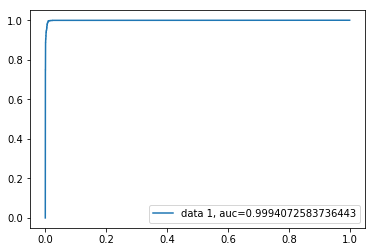

In [67]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_valid,  prob_y)
auc = metrics.roc_auc_score(y_valid,  prob_y)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Testing on entire origoinal dataset

In [68]:
df_s = df_train_final.loc[:, df_train_final.columns != 'churn_label'].columns.get_values()
features = df_s.tolist() 
X_train_all = df_train_final[features] #define training features set
y_train_all = df_train_final['churn_label'] #define training label set

In [69]:
pred_rf = rf_clf.predict(X_train_all)
acc_rf = accuracy_score(y_train_all, pred_rf)

print(acc_rf)

0.99765


In [70]:
import pandas as pd
y_actu = pd.Series(y_train_all, name='Actual')
y_pred = pd.Series(pred_rf, name='Predicted')
#df_confusion = pd.crosstab(y_pred, y_actu)

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_actu, y_pred)

array([[18518,    46],
       [    1,  1435]], dtype=int64)

In [72]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_actu, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.999946   0.96893991]
recall: [0.99752209 0.99930362]
fscore: [0.99873257 0.98388756]
support: [18564  1436]


In [73]:
#AUROC
from sklearn.metrics import roc_curve, roc_auc_score
prob_y = rf_clf_new.predict_proba(X_train_all)
prob_y = [p[1] for p in prob_y]
print( roc_auc_score(y_train_all, prob_y) )

0.9993147623309019


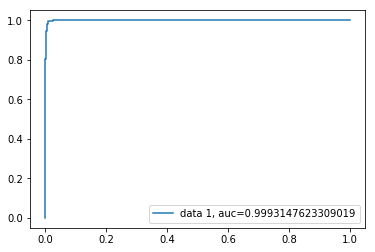

In [74]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_train_all,  prob_y)
auc = metrics.roc_auc_score(y_train_all,  prob_y)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### k-fold validation

In [ ]:
### Checks for AUC - ROC , Precision, Recall , F-1 Score and  Accuracy

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7)
model = rf_clf_new
scoring = 'accuracy'
results = cross_val_score(model, X_train_all, y_train_all, cv=kfold, scoring=scoring)
result = results.mean()
std = results.std()
print (result,std)

0.9282999999999999 0.00546443043692569


In [100]:
# Evaluate the model using 10-fold cross-validation
clf=rf_clf_new

scores = cross_val_score(clf, X_train_all, y_train_all, scoring='accuracy', cv=10)
print('Accuracy Scores are:')
print (scores)
print (scores.mean())


scores = cross_val_score(clf, X_train_all, y_train_all, scoring='f1_weighted', cv=10)
print('F1 Scores are:')
print (scores)
print (scores.mean())


SEED=42
from sklearn import (metrics, cross_validation, linear_model, preprocessing)
mean_auc = 0.0
n = 10  # repeat the CV procedure 10 times to get more precise results
for i in range(n):
    # for each iteration, randomly hold out 20% of the data as CV set
    X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
    X_train_all,y_train_all, test_size=.20, random_state=i*SEED)

    # train model and make predictions
    clf.fit(X_train, y_train) 
    preds = clf.predict_proba(X_cv)[:, 1]

    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = metrics.roc_curve(y_cv, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("AUC (fold %d/%d): %f" % (i + 1, n, roc_auc))
    mean_auc += roc_auc

print("Mean AUC: %f" % (mean_auc/n))

Accuracy Scores are:
[0.92703648 0.92853573 0.92853573 0.92803598 0.928      0.9275
 0.92846423 0.92846423 0.92846423 0.92846423]
0.9281500856500214


C:\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is il

F1 Scores are:
[0.89314741 0.893397   0.89702956 0.893397   0.8933444  0.8933444
 0.89402315 0.89402315 0.89402315 0.8937733 ]
0.8939502514229227
AUC (fold 1/10): 0.660196
AUC (fold 2/10): 0.653898
AUC (fold 3/10): 0.664751
AUC (fold 4/10): 0.664023
AUC (fold 5/10): 0.684319
AUC (fold 6/10): 0.651150
AUC (fold 7/10): 0.650857
AUC (fold 8/10): 0.636651
AUC (fold 9/10): 0.674833
AUC (fold 10/10): 0.645578
Mean AUC: 0.658626
